In [1]:
import pandas as pd
import numpy as np
%matplotlib nbagg
import matplotlib.pyplot as plt

# Upward PMT

In [2]:
d = pd.read_csv('../Data_backup/arrival_time/20200526_222754_UTC_SDOM2_HALFPOCAM_CLEMENTINE_FLASH_P3_up_1000Hz_blue_20V_30s_2020-05-26_2228_20147222804.txt',delimiter="\t",header=None)
#get a blue pocam flash from gaertners files
channel=np.array(d[0])
edge = np.array(d[1])
time = np.array(d[2])

<IPython.core.display.Javascript object>


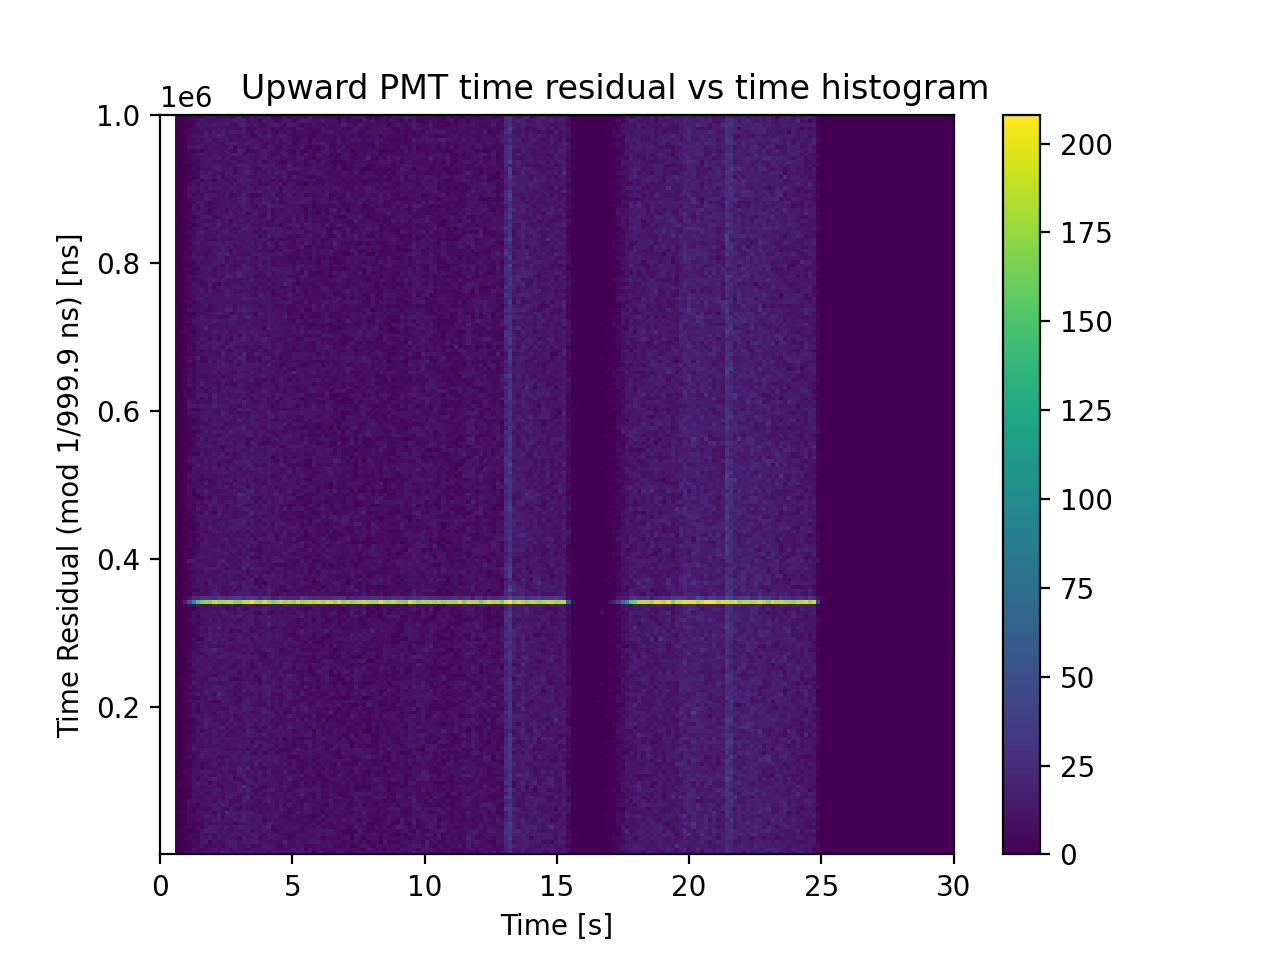

In [4]:
#find time residual
tRes = time[np.logical_and(channel==1,edge==0)] % (1e9/999.8956)
plt.close()
plt.figure()
plt.hist2d(time[np.logical_and(channel==1,edge==0)]/1e9,tRes,bins=200)
plt.title('           Upward PMT time residual vs time histogram')
plt.xlabel('Time [s]')
plt.ylabel('Time Residual (mod 1/999.9 ns) [ns]')
plt.xlim(0,30)
#plt.ylim(0,1e6)
plt.colorbar()
plt.show()

<IPython.core.display.Javascript object>


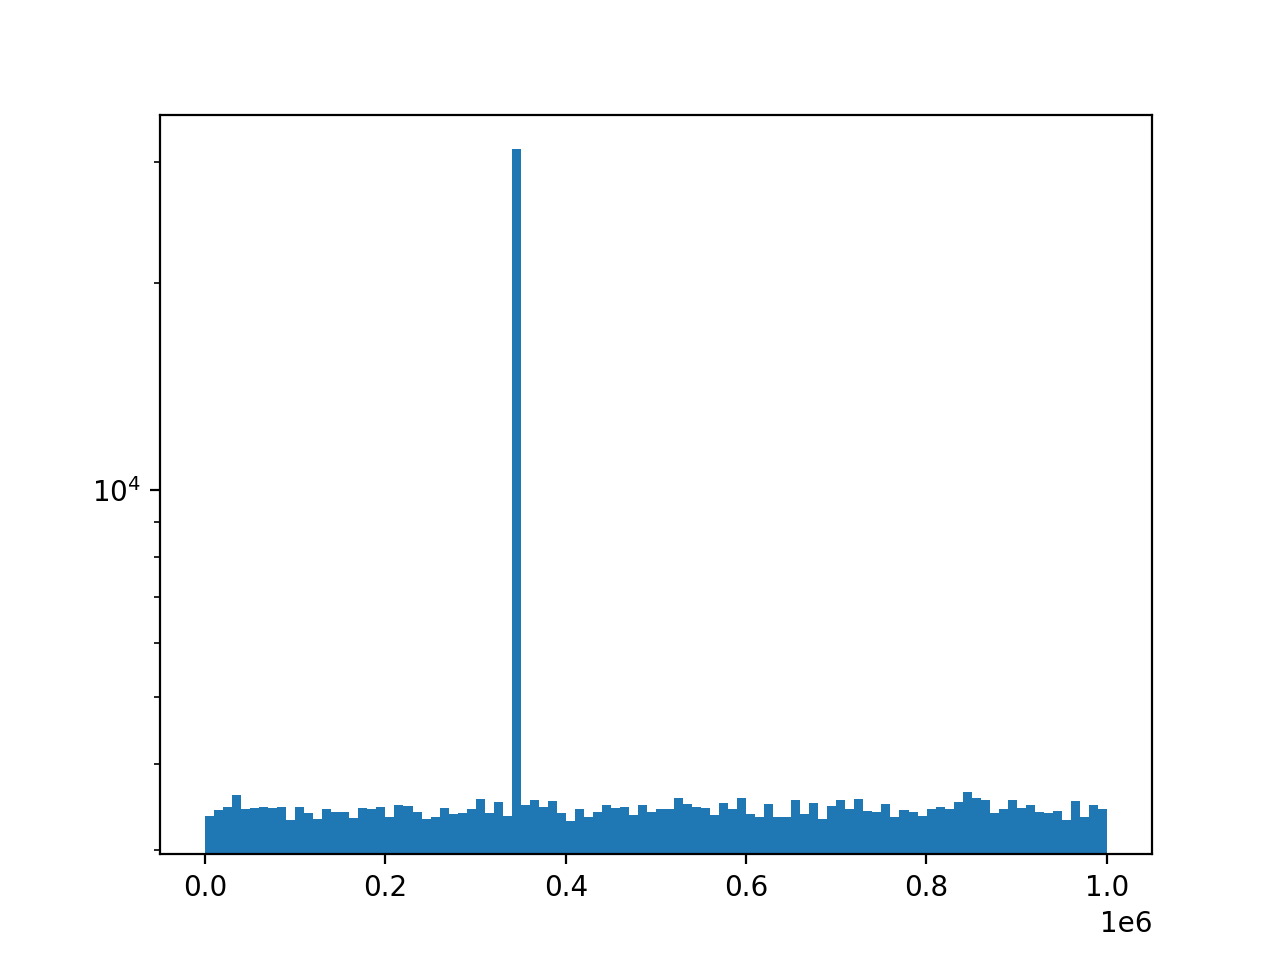

In [5]:
#find time residual in 1d hist
plt.close()
plt.figure()
plt.hist(tRes,bins=100)
plt.yscale('log')
#plt.xlim(340000,360000)
plt.show()

In [6]:
#get time residual hits for plotting
ftimes=time[np.logical_and(np.logical_and(np.logical_and(channel==1,edge==0),time%(1e9/999.8956)>340000),time%(1e9/999.8956)<350000)]
numbin = np.arange(5e9,5.005e9,1)
uphist = np.histogram(ftimes,bins=numbin)

In [18]:
#get all times for plotting
allhist = np.histogram(time[np.logical_and(channel==1,edge==0)],bins=numbin[::int(1e5)])

<IPython.core.display.Javascript object>


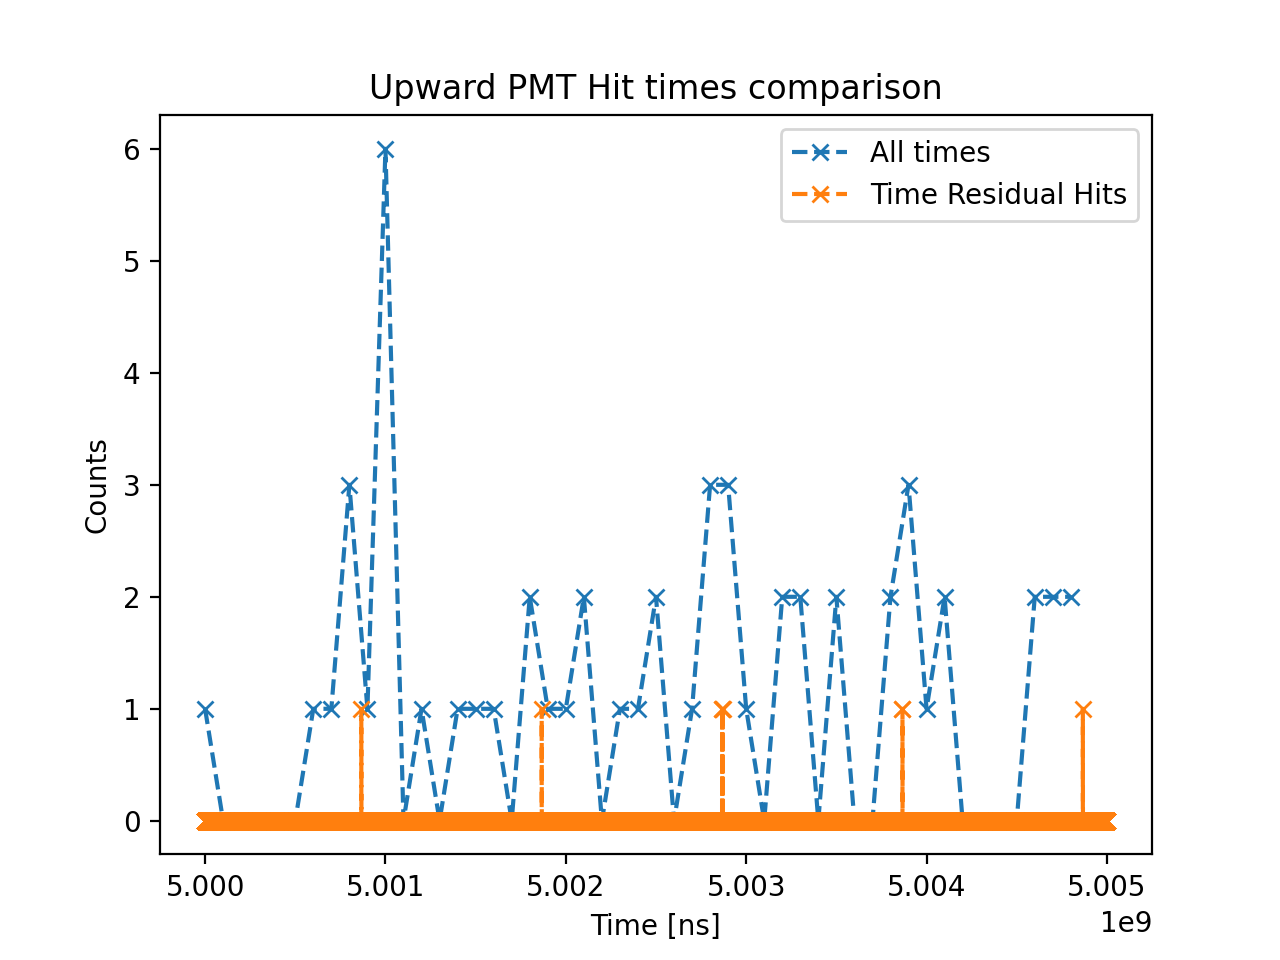

In [20]:
#plot time residual hits vs all hits to see if we can see arrival times
plt.close()
plt.figure()
plt.plot(allhist[1][:-1],allhist[0],'x--',label="All times")
plt.plot(uphist[1][:-1],uphist[0],'x--',label="Time Residual Hits")
plt.title('Upward PMT Hit times comparison')
plt.xlabel('Time [ns]')
plt.ylabel('Counts')
plt.legend(loc=0)
plt.show()

# Downward PMT

<IPython.core.display.Javascript object>


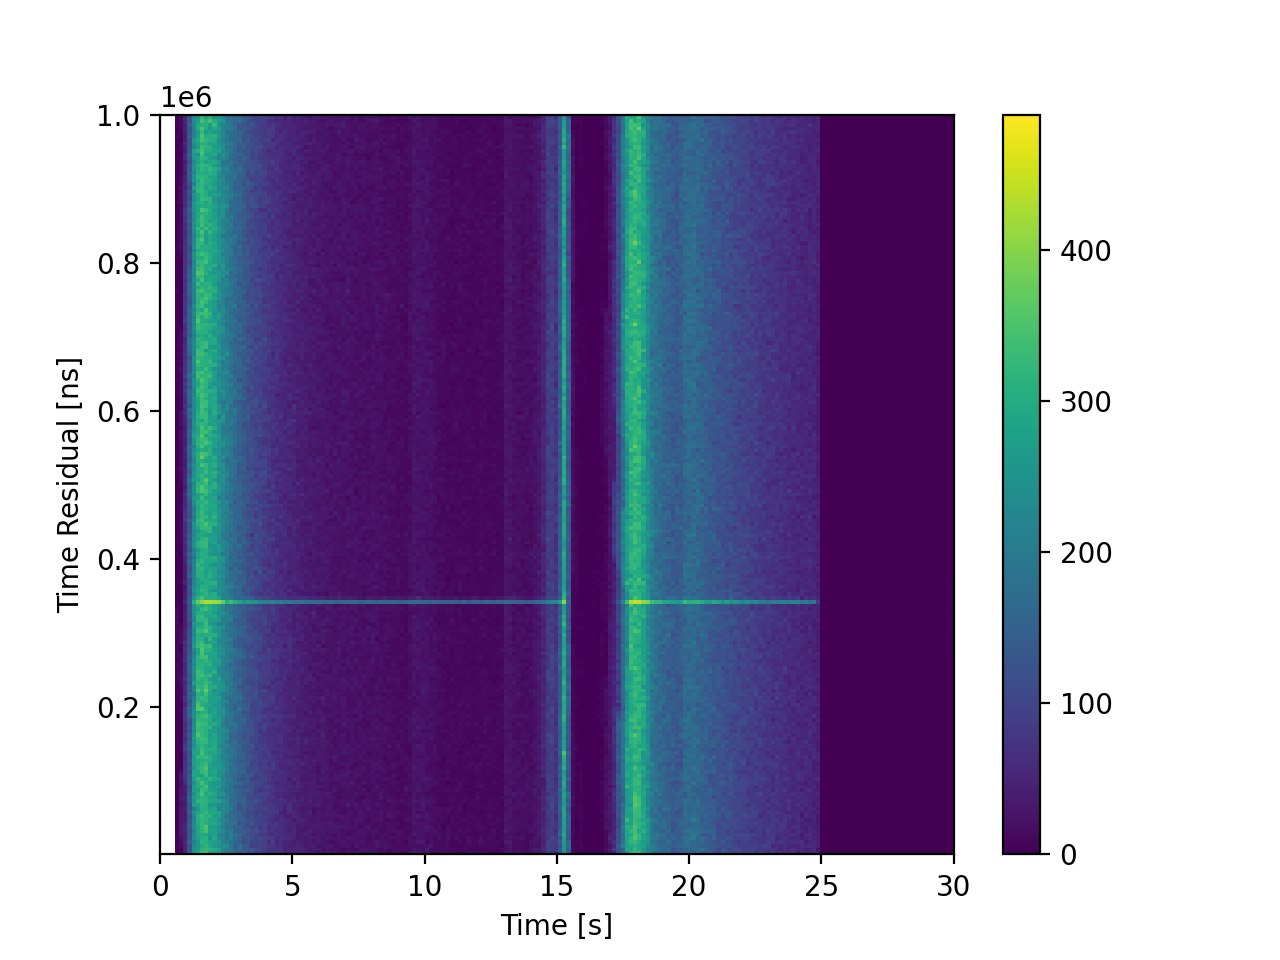

In [21]:
#redo above for downward pmt
dtRes = time[np.logical_and(channel==5,edge==0)] % (1e9/999.8956)
plt.close()
plt.figure()
plt.hist2d(time[np.logical_and(channel==5,edge==0)]/1e9,dtRes,bins=200)
plt.xlabel('Time [s]')
plt.ylabel('Time Residual [ns]')
plt.xlim(0,30)
#plt.ylim(0,1e6)
plt.colorbar()
plt.show()

<IPython.core.display.Javascript object>


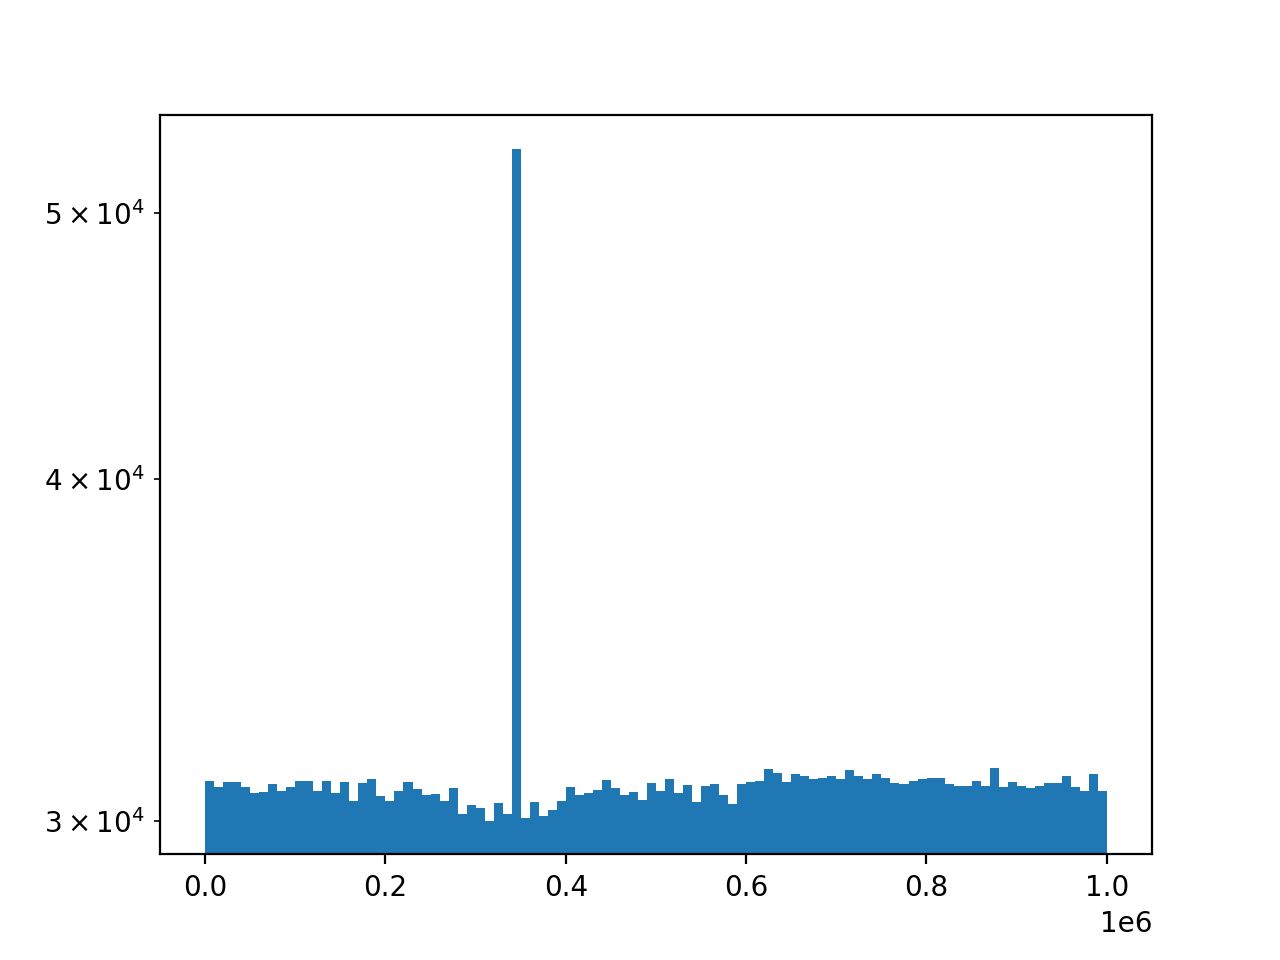

In [22]:
plt.close()
plt.figure()
plt.hist(dtRes,bins=100)
plt.yscale('log')
#plt.xlim(340000,360000)
plt.show()

In [23]:
dftimes=time[np.logical_and(np.logical_and(np.logical_and(channel==5,edge==0),time%(1e9/999.8956)>340000),time%(1e9/999.8956)<350000)]
numbin = np.arange(5e9,5.005e9,1)
downhist = np.histogram(dftimes,bins=numbin)

<IPython.core.display.Javascript object>


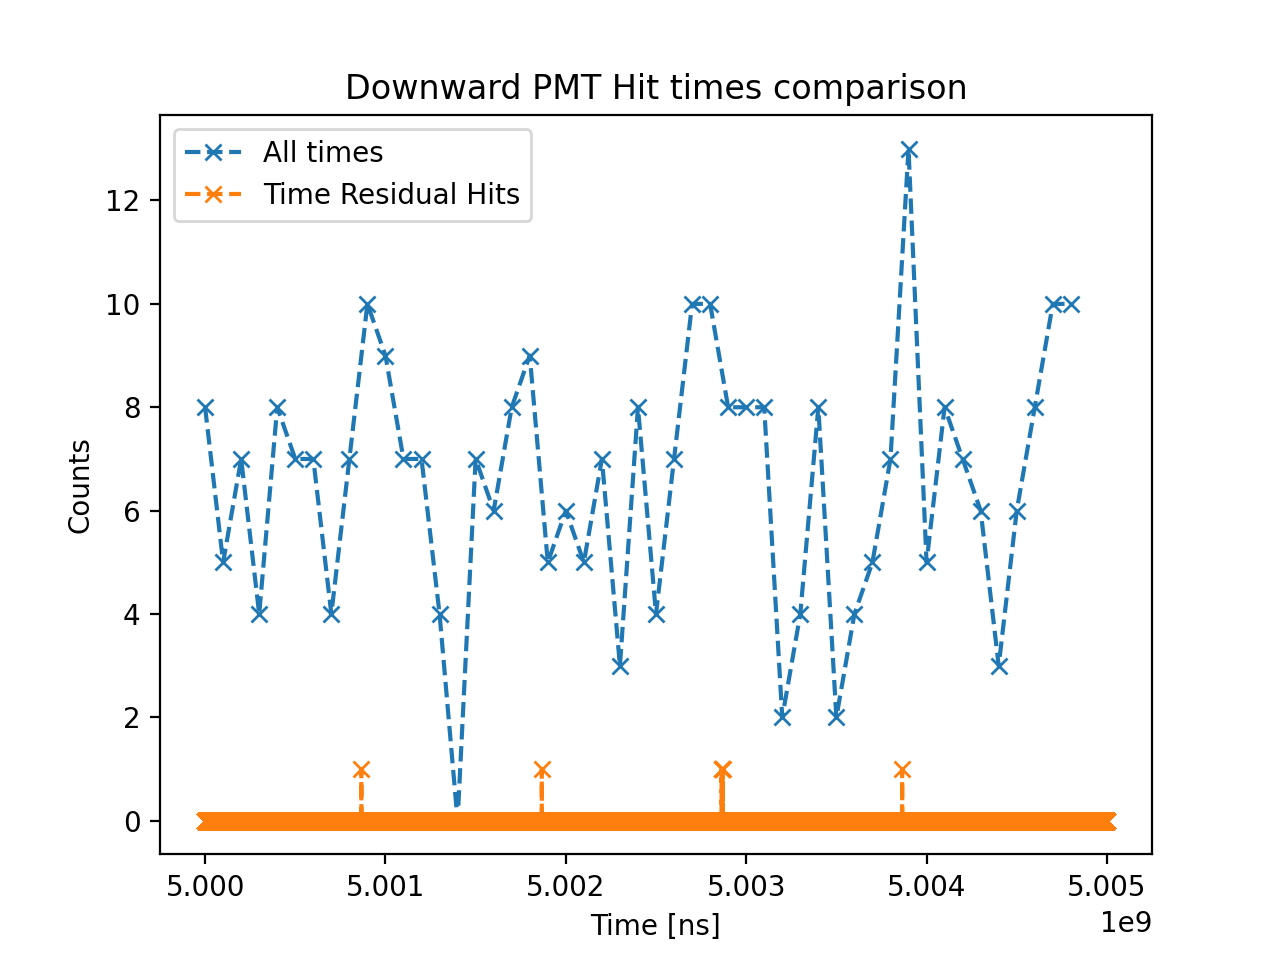

In [25]:
dallhist = np.histogram(time[np.logical_and(channel==5,edge==0)],bins=numbin[::int(1e5)])
plt.close()
plt.figure()
plt.plot(dallhist[1][:-1],dallhist[0],'x--',label="All times")
plt.plot(downhist[1][:-1],downhist[0],'x--',label="Time Residual Hits")
plt.title('Downward PMT Hit times comparison')
plt.xlabel('Time [ns]')
plt.ylabel('Counts')
plt.legend(loc=0)
plt.show()